In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.simplefilter("ignore")

In [0]:
!pip install --upgrade scikit-learn

In [0]:
import sklearn

In [0]:
sklearn.__version__

'0.22'

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
df = pd.read_csv("emotion_data.csv")
df = df[['text', 'emotion']]
# df = df.sample(frac=0.1, random_state=99).reset_index(drop=True)
# df = shuffle(df, random_state=22)

In [0]:
df['class_label'] = df['emotion'].factorize()[0]
class_label_df = df[['emotion', 'class_label']].drop_duplicates().sort_values('class_label')
label_to_id = dict(class_label_df.values)
id_to_label = dict(class_label_df[['class_label', 'emotion']].values)

In [0]:
class_label_df

,emotion,class_label
0,anger,0
1,fear,1
2,joy,2
15,sadness,3


In [0]:
print(df.shape)
print(df['emotion'].value_counts())

(7102, 3)
fear       2252
anger      1701
joy        1616
sadness    1533
Name: emotion, dtype: int64


In [0]:
df.head()

,text,emotion,class_label
0,A @FirstBSA not turning up? Why am I not surpr...,anger,0
1,"my school photo is honestly horrid, i look so ew😅",fear,1
2,felt a bit shit getting a very high blood suga...,joy,2
3,@TiganVarcolac &lt; feel this precious pleasur...,fear,1
4,"@ggreenwald Smh, remove ideologically bankrupt...",anger,0


In [0]:
y_true = df['class_label'].values
# Spliting into Train and test
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.3, stratify=y_true, random_state=0)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4971, 3) (2131, 3) (4971,) (2131,)


In [0]:
X_train.head()

,text,emotion,class_label
1178,Was going to get a new #horror movie #tattoo t...,fear,1
5936,i cant live anymore my roblox got termianted :...,sadness,3
3118,@LostGermain ' Want to have a spar?' The princ...,joy,2
2598,"They're both awful in their own ways, but just...",fear,1
4806,Cross Party Group on Crofting meeting tonight ...,joy,2


In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
df_class_distribution = df['class_label'].value_counts()
train_class_distribution = X_train['class_label'].value_counts()
test_class_distribution = X_test['class_label'].value_counts()

In [0]:
df_class_distribution.sort_values()

3    1533
2    1616
0    1701
1    2252
Name: class_label, dtype: int64

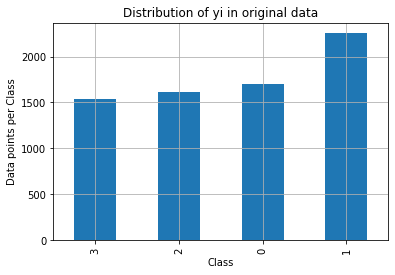

Number of data points in class 3 : 1533 ( 21.585 %)
Number of data points in class 2 : 1616 ( 22.754 %)
Number of data points in class 1 : 1701 ( 23.951 %)
Number of data points in class 0 : 2252 ( 31.709 %)


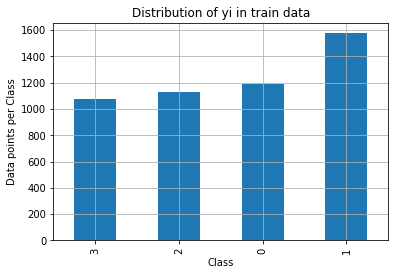

Number of data points in class 3 : 1073 ( 21.585 %)
Number of data points in class 2 : 1131 ( 22.752 %)
Number of data points in class 1 : 1191 ( 23.959 %)
Number of data points in class 0 : 1576 ( 31.704 %)
--------------------------------------------------------------------------------


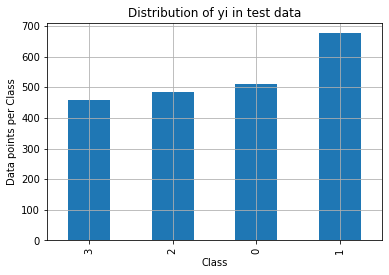

Number of data points in class 3 : 460 ( 21.586 %)
Number of data points in class 2 : 485 ( 22.759 %)
Number of data points in class 1 : 510 ( 23.932 %)
Number of data points in class 0 : 676 ( 31.722 %)


In [0]:
my_colors = 'rgbkymc'
df_class_distribution.sort_values().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in original data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(df_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',df_class_distribution.values[i], '(', np.round((df_class_distribution.values[i]/df.shape[0]*100), 3), '%)')

my_colors = 'rgbkymc'
train_class_distribution.sort_values().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.sort_values().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

In [0]:
#Bag of words
count_vect = CountVectorizer() 

X_train = count_vect.fit_transform(X_train['text'])
#Normalize Data
# X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)

X_test = count_vect.transform(X_test['text'])
#Normalize Data
# X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (4971, 13013)
Test Data Size:  (2131, 13013)


In [0]:
table = pd.DataFrame(columns = ["Model", "Accuracy(%)", "precision_macro(%)", "precision_micro(%)", "precision_weighted(%)", "f1score"])
def keeping_record(model_name, accuracy, precision_macro, precision_micro, precision_weighted, f1score):
    global table
    table = table.append(pd.DataFrame([[model_name, accuracy, precision_macro, precision_micro, precision_weighted, f1_score]], columns = ["Model", "Accuracy(%)", "precision_macro(%)", "precision_micro(%)", "precision_weighted(%)", "f1score(%)"]))
    table.reset_index(drop = True, inplace = True)

In [0]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    # print(confusionMatx)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["SAD", "FEAR", "ANGER", "JOY"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Reds", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Reds", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Reds", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [0]:

def apply_model(cross_val, X_train, y_train, X_test, y_test, model_name, hyper):
    start = datetime.now()
    cross_val.fit(X_train, y_train)
    learning_curve(cross_val, hyper)
    predicted_points = cross_val.predict(X_test)
    
    print("\n\n")
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    precision_macro = np.round(precision_score(y_test, predicted_points, average='macro')*100, 2)
    precision_micro = np.round(precision_score(y_test, predicted_points, average='micro')*100, 2)
    precision_weighted = np.round(precision_score(y_test, predicted_points, average='weighted')*100, 2)
    f1score = np.round(f1_score(y_test, predicted_points, average='macro')*100, 2)
    
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    # print(str(accuracy), str(precision_macro)+"%\n")
    print("Accuracy on test set: "+ str(accuracy) +"\n")
    print("Macro Precision on test set: "+ str(precision_macro) +"\n")
    print("Micro Precision on test set: "+ str(precision_micro) +"\n")
    print("Weighted Precision on test set: "+ str(precision_weighted) +"\n")
    print("F1 score on test set: "+ str(f1score) +"\n")
    
    print('---------------------------')
    print('|      Best Estimator      |')
    print('---------------------------')
    print("{}\n".format(cross_val.best_estimator_))
    
    print('----------------------------------')
    print('|      Best Hyper-Parameters      |')
    print('----------------------------------')
    print(cross_val.best_params_)
    
    keeping_record(model_name, accuracy, precision_macro, precision_micro, precision_weighted, f1score)
    
    print("\n\n")
    
    print_confusionMatrix(y_test, predicted_points)


In [0]:
def learning_curve(cross_val, hyper):
    train_score= cross_val.cv_results_['mean_train_score']
    train_score_std= cross_val.cv_results_['std_train_score']
    cv_score = cross_val.cv_results_['mean_test_score'] 
    cv_score_std= cross_val.cv_results_['std_test_score']


    plt.figure(figsize=(16,7))
    plt.plot(hyper, train_score, label='Train SCORE')
    plt.scatter(hyper, train_score, label='Train SCORE')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(hyper, train_score - train_score_std,train_score + train_score_std,alpha=0.2,color='darkblue')

    plt.plot(hyper, cv_score, label='CV SCORE')
    plt.scatter(hyper, cv_score, label='CV SCORE')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(hyper, cv_score - cv_score_std,cv_score + cv_score_std,alpha=0.2,color='darkorange')
    plt.legend()
    plt.xlabel("hyperparameter")
    plt.ylabel("SCORE")
    plt.title("VALIDATION CURVE")
    plt.show()

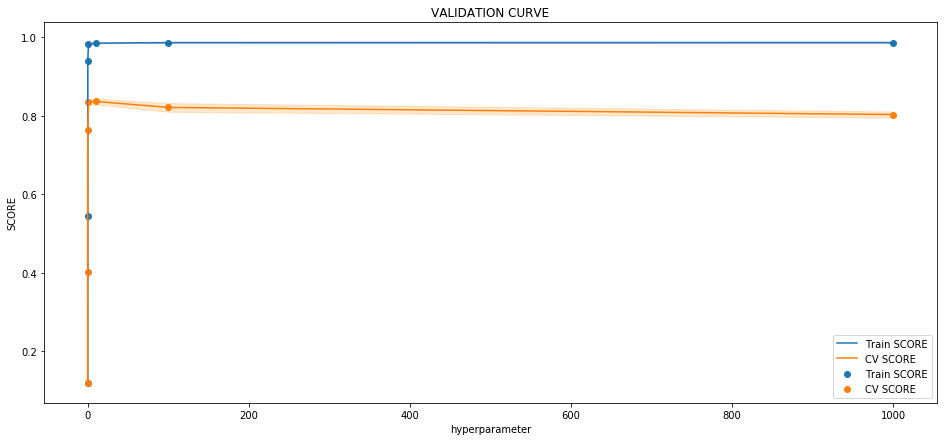




Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:21.858967

---------------------
|      Accuracy      |
---------------------
Accuracy on test set: 86.81

Macro Precision on test set: 87.19

Micro Precision on test set: 86.81

Weighted Precision on test set: 86.96

F1 score on test set: 86.66

---------------------------
|      Best Estimator      |
---------------------------
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 10}





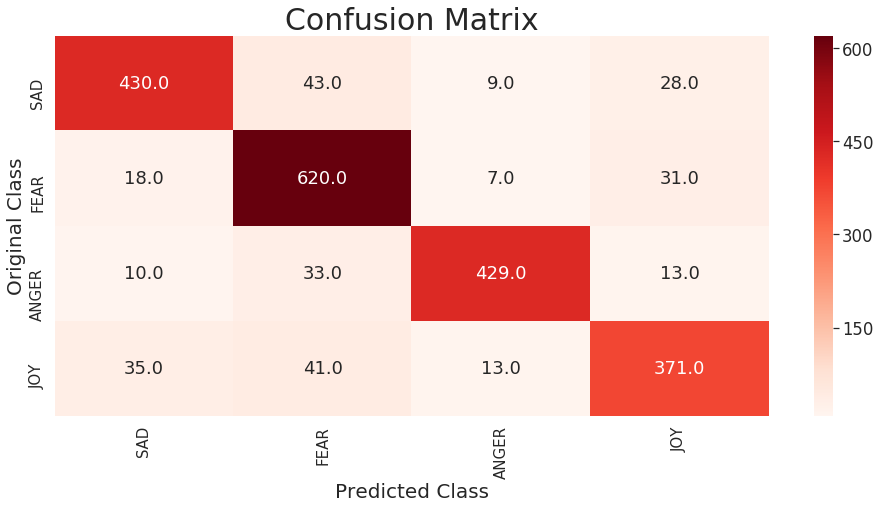

-----------------------------------------------------------------------------------------------------------------------------


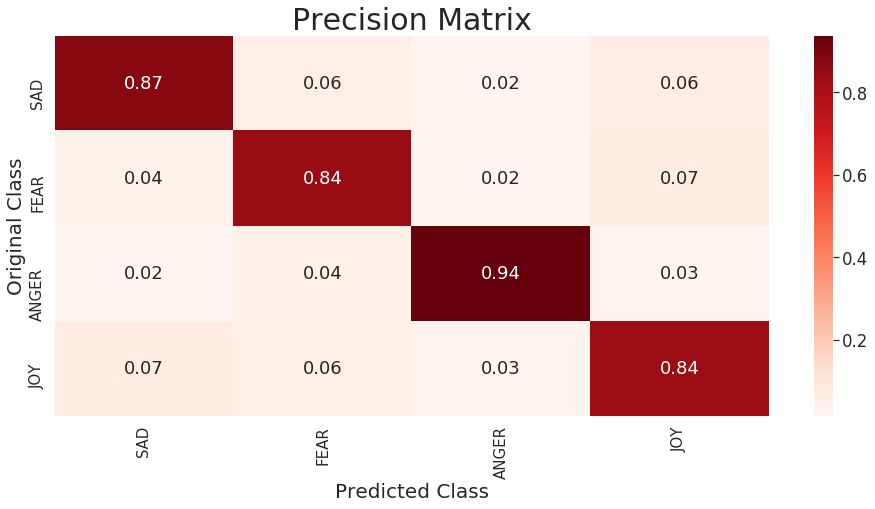

-----------------------------------------------------------------------------------------------------------------------------


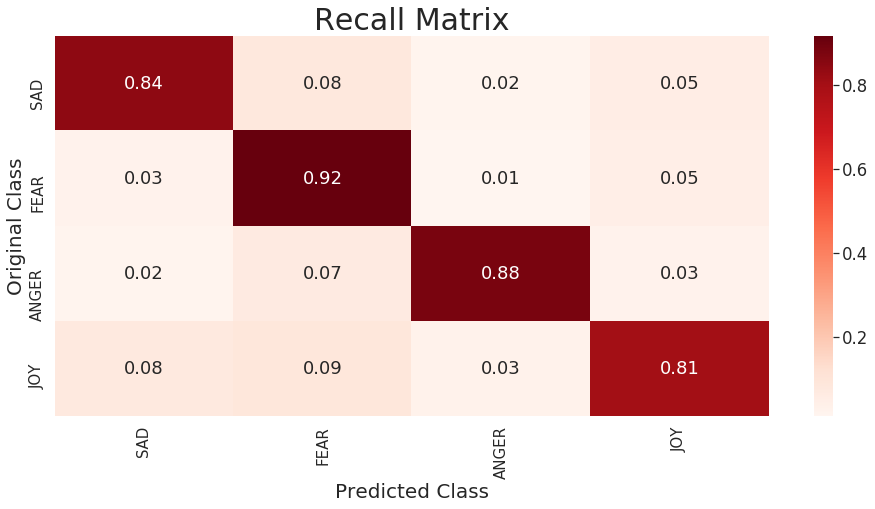

In [0]:

parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
hyper = parameters['C']
clf = LogisticRegression(multi_class = "ovr")
cross_val = GridSearchCV(clf, parameters, cv=3, scoring="f1_macro", return_train_score=True)
apply_model(cross_val, X_train, y_train, X_test, y_test, "Logistic Regression", hyper)

In [0]:

# parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
# hyper = parameters['C']
clf = LogisticRegression(C=10, multi_class = "ovr")
clf.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = clf.predict(X_test)

In [0]:
from sklearn.inspection import permutation_importance

In [0]:
result = permutation_importance(clf, X_test.toarray(), y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

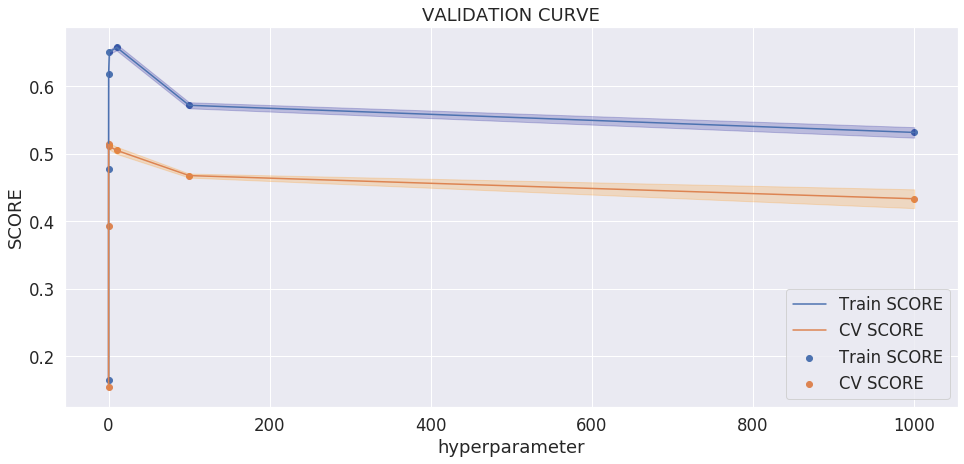




Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:37.089103

---------------------
|      Accuracy      |
---------------------
Accuracy on test set: 58.12

Macro Precision on test set: 59.91

Micro Precision on test set: 58.12

Weighted Precision on test set: 59.32

F1 score on test set: 49.56

---------------------------
|      Best Estimator      |
---------------------------
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 0.1}





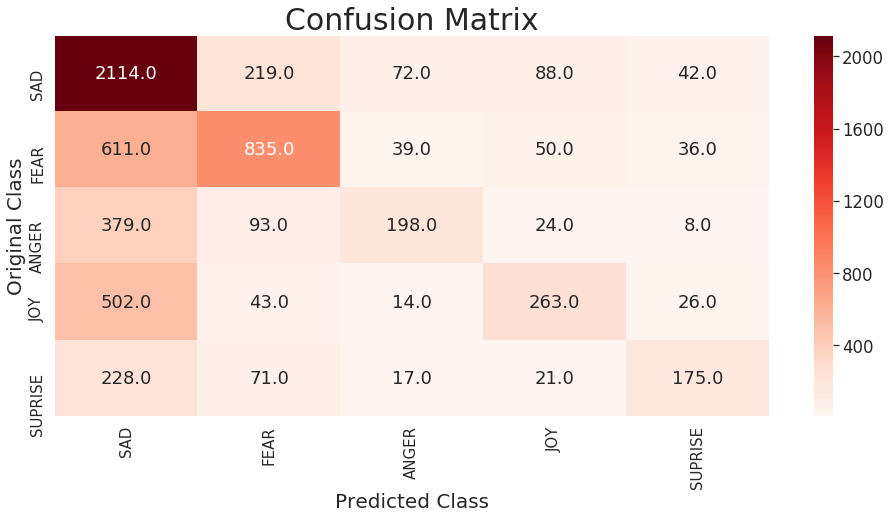

-----------------------------------------------------------------------------------------------------------------------------


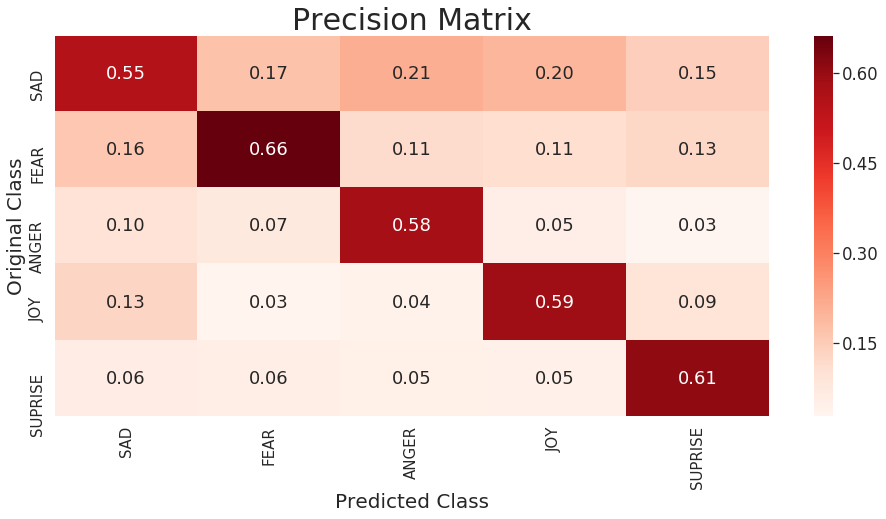

-----------------------------------------------------------------------------------------------------------------------------


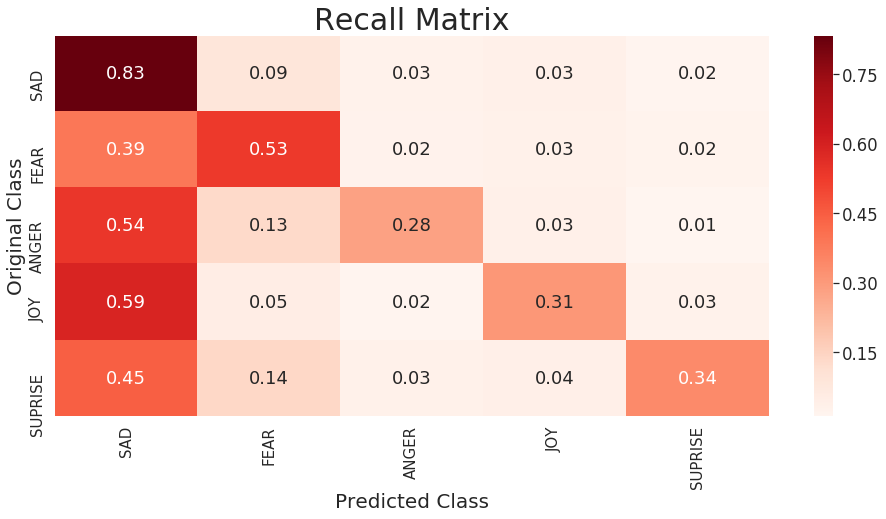

In [0]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
hyper = parameters['C']
clf = LinearSVC()
cross_val = GridSearchCV(clf, parameters, cv=3, scoring="f1_macro", return_train_score=True)
apply_model(cross_val, X_train, y_train, X_test, y_test, "Linear SVM", hyper)

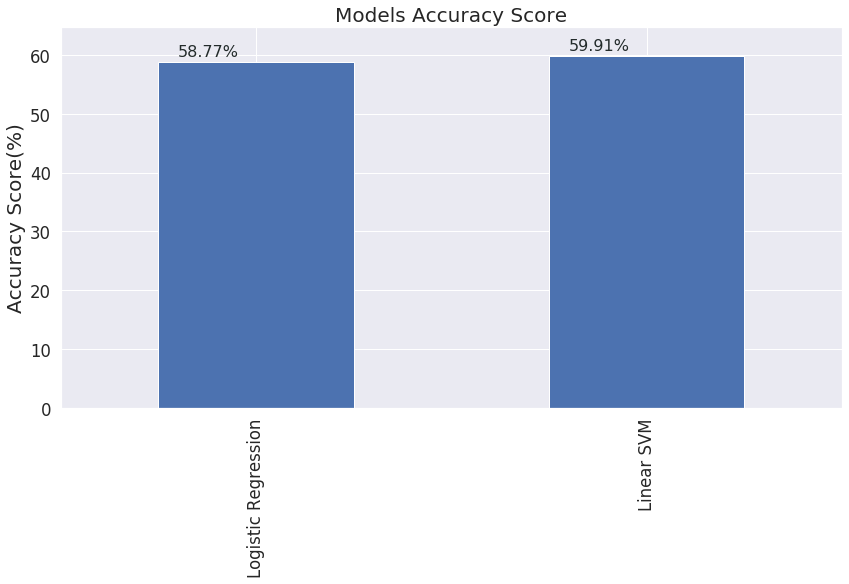

In [0]:


ax = table.plot(x = "Model", y = "precision_macro(%)", kind = "bar", figsize = (14, 7), legend = False)
plt.title("Models Accuracy Score", fontsize = 20)
plt.xlabel("")
plt.margins(x = 0, y = 0.08)
plt.ylabel("Accuracy Score(%)", fontsize = 20)
plt.grid(visible = True)
for i in ax.patches:
    ax.text(x = i.get_x()+0.05, y = i.get_height()+1, s = str(i.get_height())+"%", fontsize = 16, color = "#232b2b")

